# Analyzing Rhode Island Traffic Stops 

In [2]:
import pandas as pd
import matplotlib as plt

In [3]:
df=pd.read_csv(r"C:\Users\Nevra\Desktop\traffic_stops.csv")

C:\Users\Nevra\AppData\Local\Temp\ipykernel_11532\2202931053.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\Nevra\Desktop\traffic_stops.csv")


In [33]:
df

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
0,1,22/11/2005,11:15:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
1,2,01/10/2005,12:20:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
2,3,01/10/2005,12:30:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
3,4,01/10/2005,12:50:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
4,5,01/10/2005,13:10:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509676,509677,04/08/2015,10:40:00,X3,white,male,500.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Equipment/Inspection Violation
509677,509678,20/12/2015,11:17:00,K3,white,female,300.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
509678,509679,09/11/2015,23:35:00,X4,white,male,300.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Equipment/Inspection Violation
509679,509680,30/10/2015,11:09:00,X4,white,female,500.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding


In [34]:
df.drop("raw_row_number",axis="columns",inplace=True)

In [36]:
df.shape

(509681, 14)

In [37]:
df.isnull().sum()

date                      10
time                      10
zone                      10
subject_race           29073
subject_sex            29097
department_id             10
type                       0
arrest_made            29073
contraband_found      491919
contraband_drugs      493693
contraband_weapons    497886
contraband_alcohol    508464
reason_for_search     491919
reason_for_stop        29073
dtype: int64

In [38]:
df.dropna(subset=["date"],inplace=True)

In [39]:
df

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop
0,22/11/2005,11:15:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
1,01/10/2005,12:20:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
2,01/10/2005,12:30:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
3,01/10/2005,12:50:00,X3,white,male,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
4,01/10/2005,13:10:00,X3,white,female,200,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509675,16/08/2015,13:37:00,X1,white,female,0.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Equipment/Inspection Violation
509676,04/08/2015,10:40:00,X3,white,male,500.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Equipment/Inspection Violation
509677,20/12/2015,11:17:00,K3,white,female,300.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Speeding
509678,09/11/2015,23:35:00,X4,white,male,300.0,vehicular,False,NaN,NaN,NaN,NaN,NaN,Equipment/Inspection Violation


In [40]:
df.isnull().sum()

date                       0
time                       0
zone                       0
subject_race           29063
subject_sex            29087
department_id              0
type                       0
arrest_made            29063
contraband_found      491909
contraband_drugs      493683
contraband_weapons    497876
contraband_alcohol    508454
reason_for_search     491909
reason_for_stop        29063
dtype: int64

In [41]:
df.dtypes


date                  object
time                  object
zone                  object
subject_race          object
subject_sex           object
department_id         object
type                  object
arrest_made           object
contraband_found      object
contraband_drugs      object
contraband_weapons    object
contraband_alcohol    object
reason_for_search     object
reason_for_stop       object
dtype: object

In [42]:
df["arrest_made"]=df.arrest_made.astype("boolean")

In [46]:
df["subject_sex"]=df.subject_sex.astype("category")

In [51]:
df["contraband_found"]=df.contraband_found.astype("boolean")
df["contraband_drugs"]=df.contraband_drugs.astype("boolean")
df["contraband_weapons"]=df.contraband_weapons.astype("boolean")
df["contraband_alcohol"]=df.contraband_alcohol.astype("boolean")

In [ ]:
df["contraband_alcohol"]=df.contraband_alcohol.astype("boolean")

In [52]:
df.dtypes

date                    object
time                    object
zone                    object
subject_race            object
subject_sex           category
department_id           object
type                    object
arrest_made            boolean
contraband_found       boolean
contraband_drugs       boolean
contraband_weapons     boolean
contraband_alcohol     boolean
reason_for_search       object
reason_for_stop         object
dtype: object

In [82]:
df

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,22-11-2005 11:15:00
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,01-10-2005 12:20:00
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,01-10-2005 12:30:00
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,01-10-2005 12:50:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,01-10-2005 13:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509675,16-08-2015,13:37:00,X1,white,female,0.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,16-08-2015 13:37:00
509676,04-08-2015,10:40:00,X3,white,male,500.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,04-08-2015 10:40:00
509677,20-12-2015,11:17:00,K3,white,female,300.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,20-12-2015 11:17:00
509678,09-11-2015,23:35:00,X4,white,male,300.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,09-11-2015 23:35:00


In [83]:
df["date"]=df.date.str.replace("/","-")

In [84]:
combined=df.date.str.cat(df.time,sep=" ")

In [85]:
df["date_time"]=pd.to_datetime(combined)

In [87]:
df.date_time

0        2005-11-22 11:15:00
1        2005-01-10 12:20:00
2        2005-01-10 12:30:00
3        2005-01-10 12:50:00
4        2005-01-10 13:10:00
                 ...        
509675   2015-08-16 13:37:00
509676   2015-04-08 10:40:00
509677   2015-12-20 11:17:00
509678   2015-09-11 23:35:00
509679   2015-10-30 11:09:00
Name: date_time, Length: 509671, dtype: datetime64[ns]

In [251]:
df

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
0,22-11-2005,11:15:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-22 11:15:00
1,01-10-2005,12:20:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:20:00
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00
3,01-10-2005,12:50:00,X3,white,male,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:50:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509675,16-08-2015,13:37:00,X1,white,female,0.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,2015-08-16 13:37:00
509676,04-08-2015,10:40:00,X3,white,male,500.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,2015-04-08 10:40:00
509677,20-12-2015,11:17:00,K3,white,female,300.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2015-12-20 11:17:00
509678,09-11-2015,23:35:00,X4,white,male,300.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,2015-09-11 23:35:00


In [91]:
df.subject_sex.value_counts()

male      349446
female    131138
Name: subject_sex, dtype: int64

In [132]:
sex_counts=df.subject_sex.value_counts(normalize=True)

<AxesSubplot:>

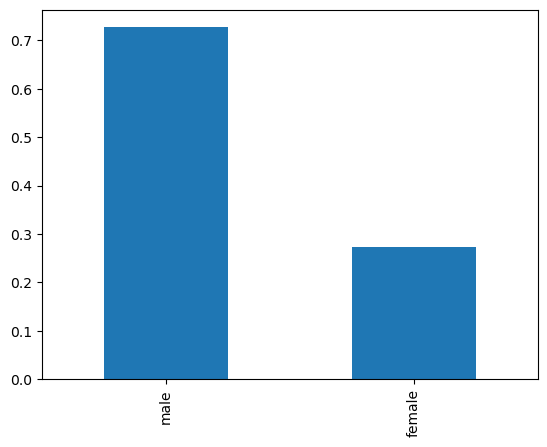

In [249]:
sex_counts.plot(kind="bar")

In [254]:
df[df["subject_sex"]=="female"]

,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,reason_for_search,reason_for_stop,date_time
2,01-10-2005,12:30:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 12:30:00
4,01-10-2005,13:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-01-10 13:10:00
7,11-09-2005,11:45:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-11-09 11:45:00
10,04-10-2005,14:28:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2005-04-10 14:28:00
15,10-10-2005,18:10:00,X3,white,female,200,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,2005-10-10 18:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509665,27-12-2015,23:32:00,K2,white,female,900.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2015-12-27 23:32:00
509673,30-12-2015,11:42:00,K2,white,female,900.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Other Traffic Violation,2015-12-30 11:42:00
509675,16-08-2015,13:37:00,X1,white,female,0.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Equipment/Inspection Violation,2015-08-16 13:37:00
509677,20-12-2015,11:17:00,K3,white,female,300.0,vehicular,False,<NA>,<NA>,<NA>,<NA>,NaN,Speeding,2015-12-20 11:17:00


In [105]:
df.reason_for_stop.value_counts()

Speeding                            268744
Other Traffic Violation              90234
Equipment/Inspection Violation       61252
Registration Violation               19830
Seatbelt Violation                   16327
Special Detail/Directed Patrol       13642
Call for Service                      7609
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               990
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [122]:
female_reason_for_stop=df[df.subject_sex=="female"].reason_for_stop.value_counts(normalize=True)

<AxesSubplot:title={'center':"Reasons for Stopping Females'"}, xlabel='reasons for stopping', ylabel='percentage'>

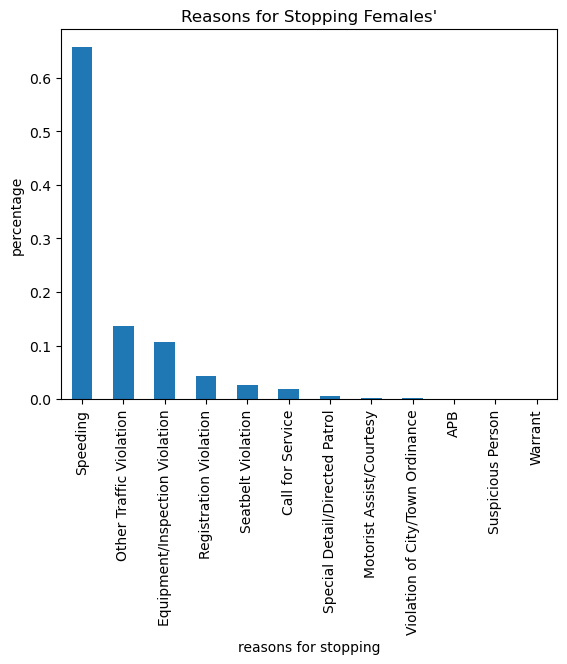

In [128]:
female_reason_for_stop.plot(kind="bar", xlabel="reasons for stopping", ylabel="percentage", title="Reasons for Stopping Females'")

In [172]:
male_reason_for_stop=df[df.subject_sex=="male"].reason_for_stop.value_counts(normalize=True)

<AxesSubplot:title={'center':"Reasons for Stopping Males'"}, xlabel='reasons for stopping', ylabel='percentage'>

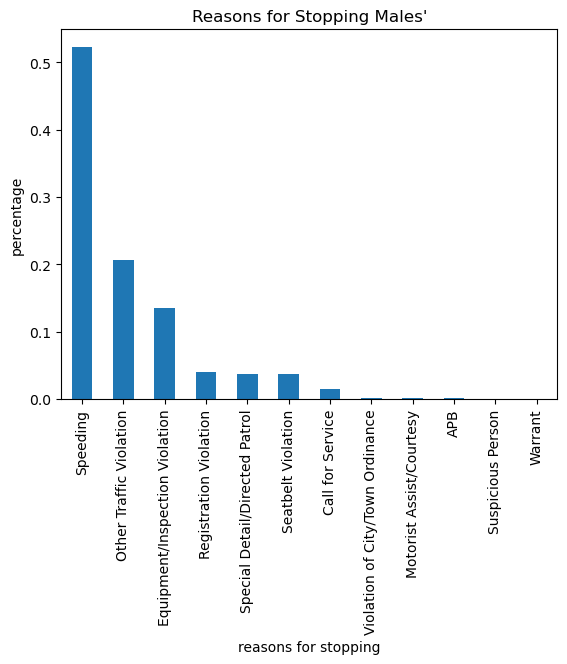

In [173]:
male_reason_for_stop.plot(kind="bar", xlabel="reasons for stopping", ylabel="percentage", title="Reasons for Stopping Males'")

In [238]:
sex_reason_for_stop=df[["reason_for_stop","subject_sex"]].groupby(["subject_sex"]).value_counts()

In [239]:
sex_reason_for_stop

subject_sex  reason_for_stop                 
female       Speeding                             86198
             Other Traffic Violation              17911
             Equipment/Inspection Violation       14039
             Registration Violation                5649
             Seatbelt Violation                    3550
             Call for Service                      2368
             Special Detail/Directed Patrol         665
             Motorist Assist/Courtesy               332
             Violation of City/Town Ordinance       216
             APB                                    109
             Suspicious Person                       74
             Warrant                                 27
male         Speeding                            182538
             Other Traffic Violation              72317
             Equipment/Inspection Violation       47211
             Registration Violation               14181
             Special Detail/Directed Patrol       12977
  

In [240]:
colors=[]
for x, y in sex_reason_for_stop.items():
    if x[0]=="female":
          colors.append("red")
    else:
        colors.append("blue")
        

In [241]:
sex_reason_for_stop.items()

<AxesSubplot:xlabel='subject_sex,reason_for_stop'>

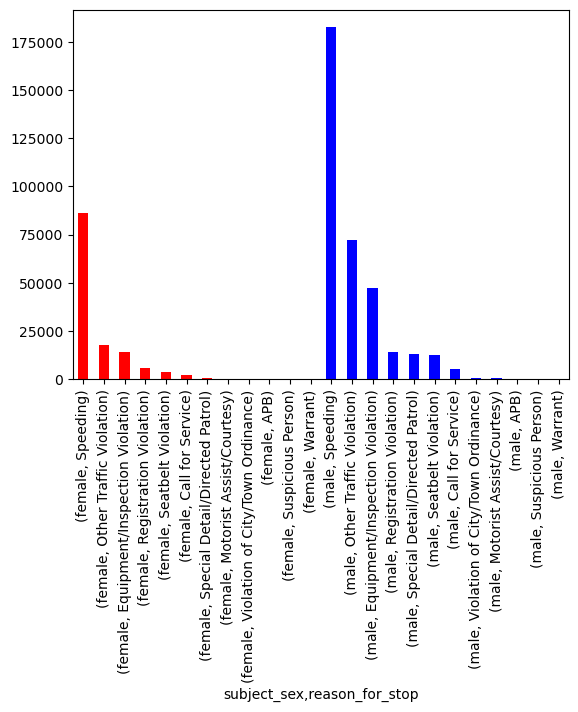

In [248]:
sex_reason_for_stop.plot(kind="bar",color=colors)

In [185]:
sex_reason_for_stop

subject_sex  reason_for_stop                 
female       APB                                    109
             Call for Service                      2368
             Equipment/Inspection Violation       14039
             Motorist Assist/Courtesy               332
             Other Traffic Violation              17911
             Registration Violation                5649
             Seatbelt Violation                    3550
             Special Detail/Directed Patrol         665
             Speeding                             86198
             Suspicious Person                       74
             Violation of City/Town Ordinance       216
             Warrant                                 27
male         APB                                    376
             Call for Service                      5237
             Equipment/Inspection Violation       47211
             Motorist Assist/Courtesy               657
             Other Traffic Violation              72317
  